# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 8.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
373500,0.0024,0.0024,0.0024,0.0024,0.0024,0.0293,0.2148,0.1831,0.0024,0.1221,8,0,15,0
38978,0.0073,0.0122,0.1074,0.1685,0.0024,0.0024,0.0366,0.3735,1.0840,0.6372,7,7,5,5
432530,0.0024,0.0024,0.0024,0.0024,0.0024,0.1147,0.3003,0.1416,0.0024,0.0928,0,0,0,0
336139,0.0049,0.0024,0.0024,0.0024,0.0024,0.0293,0.1074,0.0586,0.0024,0.0464,0,0,0,0
73810,0.0098,0.0122,0.0049,0.0024,0.0024,0.0024,0.0024,0.0317,0.0024,0.0024,0,0,0,0


In [3]:
raw_data.shape

(449730, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449730 entries, 0 to 449729
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          449730 non-null  float64
 1   Emg2          449730 non-null  float64
 2   Emg3          449730 non-null  float64
 3   Emg4          449730 non-null  float64
 4   Emg5          449730 non-null  float64
 5   Emg6          449730 non-null  float64
 6   Emg7          449730 non-null  float64
 7   Emg8          449730 non-null  float64
 8   Emg9          449730 non-null  float64
 9   Emg10         449730 non-null  float64
 10  repetition    449730 non-null  int64  
 11  rerepetition  449730 non-null  int64  
 12  stimulus      449730 non-null  int64  
 13  restimulus    449730 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 48.0 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000
mean,0.009672,0.077479,0.072574,0.050732,0.022604,0.050304,0.215483,0.240273,0.077911,0.196562,3.278532,2.272719,5.811698,4.161110
std,0.014184,0.193192,0.232346,0.150322,0.063215,0.096565,0.406609,0.383662,0.201897,0.360472,3.492835,3.274170,6.608935,6.308636
min,0.000000,0.000000,0.002400,0.002400,0.002400,0.000000,0.002400,0.002400,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.031700,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
50%,0.002400,0.002400,0.002400,0.002400,0.002400,0.004900,0.080600,0.100100,0.002400,0.046400,2.000000,0.000000,3.000000,0.000000
75%,0.012200,0.058600,0.029300,0.022000,0.007300,0.061000,0.273400,0.300300,0.053700,0.249000,6.000000,4.000000,11.000000,8.000000
max,0.820300,3.728000,4.663100,3.754900,1.384300,1.635700,4.665500,4.668000,3.415500,4.663100,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     181641
12     15520
2      15500
4      15500
8      15495
7      15494
9      15474
11     15470
6      15458
5      15452
3      15436
10     15417
1      15408
14     10345
13     10336
17     10328
15     10292
16     10267
19      5175
21      5162
18      5160
23      5138
20      5132
22      5130
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

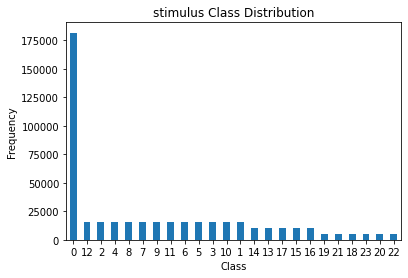

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
378454,0.0024,0.0024,0.0024,0.0024,0.0024,0.0073,0.1660,0.0024,0.0024,0.0122,0,0,0,0
167805,0.0024,0.0757,0.0024,0.0024,0.0024,0.0024,0.0610,0.0293,0.0024,0.0024,10,10,8,8
260441,0.0073,0.0024,0.0024,0.0024,0.0024,0.0073,0.0391,0.1245,0.0171,0.0195,0,0,0,0
119053,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.1343,0.0244,0.0806,0.0024,2,2,3,3
382008,0.0024,0.1367,0.0293,0.0049,0.0098,0.0854,0.2319,0.3735,0.1318,0.0635,8,8,16,16


In [12]:
raw_data.shape

(364664, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364664 entries, 0 to 449729
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          364664 non-null  float64
 1   Emg2          364664 non-null  float64
 2   Emg3          364664 non-null  float64
 3   Emg4          364664 non-null  float64
 4   Emg5          364664 non-null  float64
 5   Emg6          364664 non-null  float64
 6   Emg7          364664 non-null  float64
 7   Emg8          364664 non-null  float64
 8   Emg9          364664 non-null  float64
 9   Emg10         364664 non-null  float64
 10  repetition    364664 non-null  int64  
 11  rerepetition  364664 non-null  int64  
 12  stimulus      364664 non-null  int64  
 13  restimulus    364664 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 41.7 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [16]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

# Decision Tree

In [17]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred1 = tree.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 83.63429448946293


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     36119
           1       0.87      0.87      0.87      1954
           2       0.82      0.83      0.82      1922
           3       0.74      0.75      0.75      2033
           4       0.75      0.75      0.75      2058
           5       0.69      0.70      0.70      2110
           6       0.81      0.81      0.81      2091
           7       0.73      0.71      0.72      2167
           8       0.74      0.73      0.74      2207
           9       0.69      0.67      0.68      2223
          10       0.70      0.68      0.69      1851
          11       0.78      0.77      0.77      2086
          12       0.75      0.73      0.74      2125
          13       0.75      0.76      0.75      1388
          14       0.67      0.67      0.67      1386
          15       0.69      0.71      0.70      1459
          16       0.75      0.78      0.77      1382
 

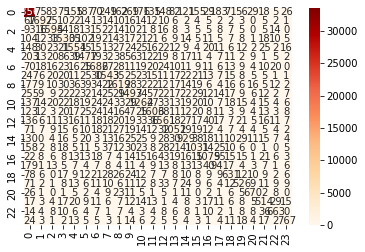

In [20]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 1.2442789957906573
MSE: 13.953450427104329
RMSE: 3.7354317591282977


In [22]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8363110015823084
Recall Score :  0.8363429448946293
f1_score :  0.8362894606623784


# KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 88.01914085530555


Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     36119
           1       0.94      0.92      0.93      1954
           2       0.90      0.87      0.88      1922
           3       0.84      0.83      0.84      2033
           4       0.89      0.81      0.85      2058
           5       0.80      0.75      0.77      2110
           6       0.90      0.85      0.87      2091
           7       0.80      0.74      0.77      2167
           8       0.84      0.75      0.79      2207
           9       0.83      0.70      0.76      2223
          10       0.86      0.72      0.79      1851
          11       0.89      0.82      0.85      2086
          12       0.85      0.77      0.81      2125
          13       0.87      0.81      0.84      1388
          14       0.76      0.74      0.75      1386
          15       0.77      0.71      0.74      1459
          16       0.89      0.82      0.86      1382
 

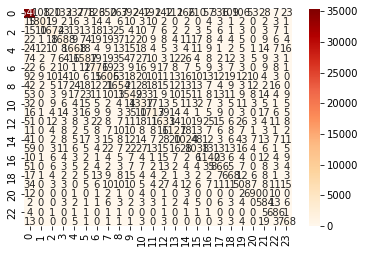

In [26]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.9563023596999987
MSE: 11.000891228936148
RMSE: 3.3167591454514973


In [28]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.8781406895721283
Recall Score :  0.8801914085530556
f1_score :  0.8771581745931808


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 91.38524399106028


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     36119
           1       0.97      0.95      0.96      1954
           2       0.95      0.90      0.93      1922
           3       0.91      0.89      0.90      2033
           4       0.93      0.84      0.88      2058
           5       0.88      0.81      0.85      2110
           6       0.96      0.90      0.93      2091
           7       0.85      0.80      0.83      2167
           8       0.88      0.85      0.86      2207
           9       0.89      0.77      0.83      2223
          10       0.93      0.79      0.85      1851
          11       0.94      0.87      0.90      2086
          12       0.91      0.84      0.87      2125
          13       0.95      0.85      0.90      1388
          14       0.81      0.80      0.81      1386
          15       0.83      0.82      0.82      1459
          16       0.93      0.89      0.91      1382
 

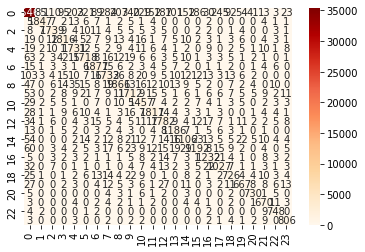

In [32]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.7060452744299562
MSE: 8.125512456638285
RMSE: 2.850528452171331


In [34]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9137600287266812
Recall Score :  0.9138524399106028
f1_score :  0.9125089960278118


# XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIn

[14:07:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [36]:
y_pred4 = xgb.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 86.79061604486309


Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     36119
           1       0.94      0.91      0.92      1954
           2       0.87      0.84      0.85      1922
           3       0.81      0.79      0.80      2033
           4       0.86      0.77      0.81      2058
           5       0.76      0.70      0.73      2110
           6       0.92      0.80      0.86      2091
           7       0.81      0.69      0.75      2167
           8       0.81      0.75      0.78      2207
           9       0.82      0.66      0.73      2223
          10       0.85      0.67      0.75      1851
          11       0.86      0.80      0.83      2086
          12       0.83      0.73      0.78      2125
          13       0.86      0.72      0.79      1388
          14       0.69      0.71      0.70      1386
          15       0.75      0.74      0.74      1459
          16       0.85      0.78      0.81      1382
 

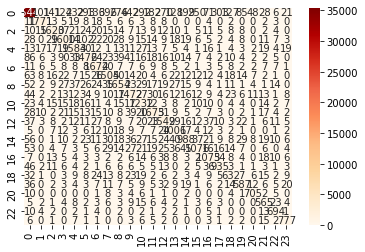

In [38]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 1.0346893724377169
MSE: 11.737964981558417
RMSE: 3.4260713625898713


In [40]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.8656022916712174
Recall Score :  0.8679061604486309
f1_score :  0.8642906916166492


# ExtraTreesClassifier

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)

ExtraTreesClassifier()

In [42]:
y_pred5 = extratree.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 91.85553864505779


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     36119
           1       0.98      0.95      0.96      1954
           2       0.96      0.92      0.94      1922
           3       0.93      0.90      0.91      2033
           4       0.95      0.85      0.89      2058
           5       0.89      0.82      0.85      2110
           6       0.96      0.91      0.94      2091
           7       0.87      0.81      0.84      2167
           8       0.90      0.84      0.87      2207
           9       0.90      0.78      0.83      2223
          10       0.94      0.80      0.87      1851
          11       0.94      0.88      0.91      2086
          12       0.93      0.84      0.88      2125
          13       0.95      0.87      0.91      1388
          14       0.82      0.81      0.82      1386
          15       0.83      0.82      0.83      1459
          16       0.95      0.90      0.93      1382
 

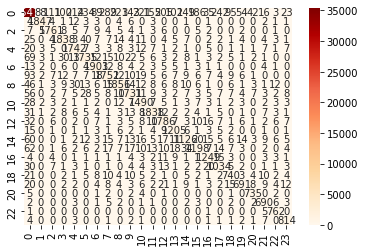

In [44]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [45]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.6761136933898235
MSE: 7.811621625327355
RMSE: 2.7949278390197043


In [46]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9188831374157057
Recall Score :  0.9185553864505779
f1_score :  0.9173603913859323
